In [106]:
import numpy as np
import pandas as pd
from sklearn.metrics import  roc_auc_score
from calc_auc import calculate_auc
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
#Loading and processing with control group data 
from preprocess_testnew_data_control import process_testdata
#Define file paths and other parameters.
file_path_T = '/EV_rep1M7_Mar16complete_output_xist.csv'
file_path_D='/EV_DMSO_Mar16complete_output_xist.csv'
depth_threshold = 50
rf_mutation_Count = 0
pipe_truncation_count =0
rate_mut = 0.25
rate_stop =1
acc_threshold = 0
filtered_base =False
filter_acc = True  
#Invoke the function to process the data.
X28s, y28s, y28s_mut_score, y28s_stop_score,df28s_cleaned = process_testdata(file_path_T,file_path_D, depth_threshold, rf_mutation_Count,
                                                             pipe_truncation_count, rate_mut, rate_stop,
                                                             acc_threshold, filtered_bases=filtered_base,
                                                             filter_acc=filter_acc)

X28s.shape,y28s.shape,y28s_mut_score.shape,y28s_stop_score.shape


((10543, 15), (10543,), (10543,), (10543,))

In [30]:
#Loading and processing without control group data 
from preprocess_testnew_data import process_testdata
file_path_T = '/50_human_HeLa_18s.csv'
depth_threshold = 50
rf_mutation_Count = 0
pipe_truncation_count =0
rate_mut = 0.25
rate_stop =1
acc_threshold = 0
filtered_base =False
filter_acc = True  
X18s, y18s, y18s_mut_score, y18s_stop_score,df18s_cleaned = process_testdata(file_path_T, depth_threshold, rf_mutation_Count,
                                                             pipe_truncation_count, rate_mut, rate_stop,
                                                             acc_threshold, filtered_bases=filtered_base,
                                                             filter_acc=filter_acc)

X18s.shape,y18s.shape,y18s_mut_score.shape,y18s_stop_score.shape

((1869, 15), (1869,), (1869,), (1869,))

In [41]:
# #loadthemodel 
automl=pickle.load(open("/SHAPE_6_7_200s_model.sav",'rb')) 


In [25]:
# test
proba_results_XG_t = automl.predict_proba(X_test)
proba_results_second_column_t = proba_results_XG_t[:, 1]
auc = roc_auc_score(y_test,proba_results_second_column_t)
print("auc: %.2f%%" % (auc*100.0))


auc: 71.48%


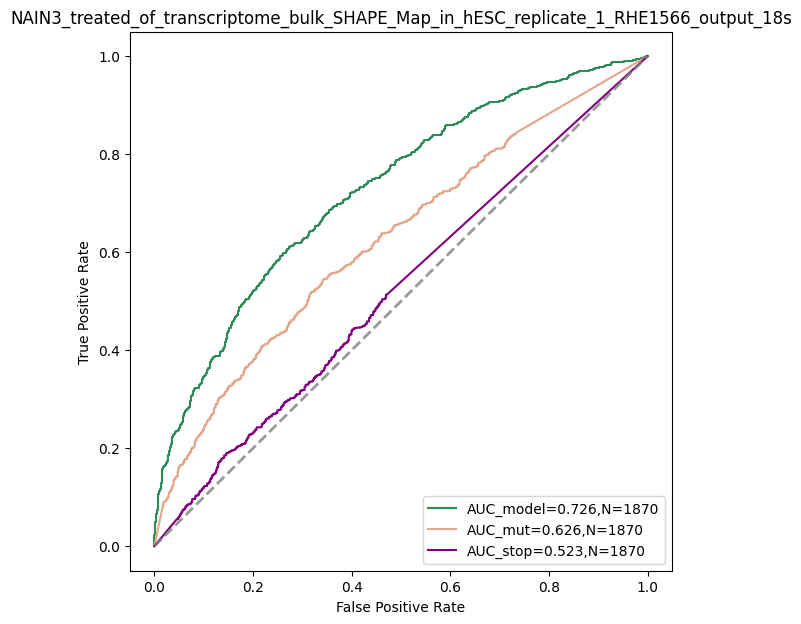

In [105]:
rf_mutation_Count=0
pipe_truncation_count=0
output_directory = 'only_stop_mut'
file_name = os.path.basename(file_path_T_18s)
plot_title = file_name.split('.')[0]
save_path = os.path.join(output_directory, f"{plot_title}.pdf")

auc_model,auc_stop,auc_mut,position_18s,result18s,y18s_mut,y18s_stop,plt=calculate_auc(Xsc18s, ysc18s, automl, dfsc18s_cleaned, rf_mutation_Count, pipe_truncation_count,title=plot_title,save_path=save_path)


new_row = pd.DataFrame({"file_name": [plot_title],  "AUC_model": [auc_model], "AUC_mut": [auc_mut], "AUC_stop": [auc_stop]})
df = pd.concat([df, new_row], ignore_index=True)
output_csv_path = os.path.join(output_directory, "SHAPE_AUC.csv")
df.to_csv(output_csv_path, index=False)


from output_model_result import merge_and_save_data
sequence_length_18s = 1870

csv_path = os.path.join(output_directory, f"{plot_title}.csv")
merge_and_save_data(position_18s, result18s, y18s_mut,y18s_stop,sequence_length_18s, csv_path)


In [ ]:
# Batch process control group data.
from preprocess_testnew_data_control import process_testdata
from output_model_result import merge_and_save_data

directory_path = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/test_data_control/wanyue_sc18s1'
file_path_D = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/test_data_control/46_hESC_DMSO_RHE1546_18s.csv'
output_directory = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/shape_result/6_7_model_result/sc'
result_csv_path = os.path.join(output_directory, "modelAUC_.csv")
depth_threshold = 50
rf_mutation_Count = 0
pipe_truncation_count = 0
rate_mut = 0.25
rate_stop = 1
acc_threshold = 0
filtered_base = False
filter_acc = False
sequence_length = 5227

# Read or initialize the results DataFrame
if os.path.exists(result_csv_path):
    df = pd.read_csv(result_csv_path)
else:
    df = pd.DataFrame(columns=["file_name", "AUC_model", "AUC_mut", "AUC_stop"])

# Iterate through all files in the directory.
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".csv"): 
            file_path_T_18s = os.path.join(root, file)
            
            # Call the function to process the data.
            Xsc18s, ysc18s, ysc18s_mut_score, ysc18s_stop_score, dfsc18s_cleaned = process_testdata(
                file_path_T_18s, file_path_D, depth_threshold, rf_mutation_Count,
                pipe_truncation_count, rate_mut, rate_stop,
                acc_threshold, filtered_bases=filtered_base,
                filter_acc=filter_acc
            )
            file_name = os.path.basename(file_path_T_18s)
            plot_title = file_name.split('.')[0]
            save_path = os.path.join(output_directory, f"{plot_title}.pdf")
            auc_model, auc_stop, auc_mut, position_18s, result18s, y18s_mut, y18s_stop, plt = calculate_auc(
                Xsc18s, ysc18s, automl, dfsc18s_cleaned, rf_mutation_Count, pipe_truncation_count, title=plot_title, save_path=save_path
            )
            new_row = pd.DataFrame({"file_name": [plot_title], "AUC_model": [auc_model], "AUC_mut": [auc_mut], "AUC_stop": [auc_stop]})
            df = pd.concat([df, new_row], ignore_index=True)

            # Save the updated results to a CSV file.
            df.to_csv(result_csv_path, index=False)

            # Save the merged data.  
            csv_path = os.path.join(output_directory, f"{plot_title}.csv")
            merge_and_save_data(position_18s, result18s, y18s_mut, y18s_stop, sequence_length, csv_path)


In [ ]:
# Handling data without a control group
from preprocess_testnew_data import process_testdata
from output_model_result import merge_and_save_data
directory_path = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/test_data_control/wanyue_sc28s1'
output_directory = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/shape_result/6_7_model_result/SC_last_result_10_12/no_control_28s/15'
result_csv_path = os.path.join(output_directory, "sc_shape_nocontrol_10_12_28s_all.csv")
sequence_length = 5227
depth_threshold = 10
rf_mutation_Count = 0
pipe_truncation_count = 0
rate_mut = 0.25
rate_stop = 1
acc_threshold = 0
filtered_base = False
filter_acc = True
if os.path.exists(result_csv_path):
    df = pd.read_csv(result_csv_path)
else:
    df = pd.DataFrame(columns=["file_name", "AUC_model", "AUC_mut", "AUC_stop"])


for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".csv"):  
            file_path_T = os.path.join(root, file)
            X, y, y_mut_score, y_stop_score, df_cleaned = process_testdata(
                file_path_T, depth_threshold, rf_mutation_Count,
                pipe_truncation_count, rate_mut, rate_stop,
                acc_threshold, filtered_bases=filtered_base,
                filter_acc=filter_acc
            )


            file_name = os.path.basename(file_path_T)
            plot_title = file_name.split('.csv')[0]
            save_path = os.path.join(output_directory, f"{plot_title}.pdf")
            auc_model, auc_stop, auc_mut, position, result, y_mut, y_stop, plt = calculate_auc(
                X, y, automl, df_cleaned, rf_mutation_Count, pipe_truncation_count, title=plot_title, save_path=save_path
            )

            new_row = pd.DataFrame({"file_name": [plot_title], "AUC_model": [auc_model], "AUC_mut": [auc_mut], "AUC_stop": [auc_stop]})
            df = pd.concat([df, new_row], ignore_index=True)

            df.to_csv(result_csv_path, index=False)

            csv_path = os.path.join(output_directory, f"{plot_title}.csv")
            merge_and_save_data(position, result, y_mut, y_stop, sequence_length, csv_path)


In [ ]:
#Process single-cell data by merging the AUC of all cells into a single AUC plot, with or without a control group
from preprocess_testnew_data_control import process_testdata 
from output_model_result import merge_and_save_data
directory_path = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/test_data_control/wanyue_sc18s1'
file_path_D = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/test_data_control/46_hESC_DMSO_RHE1540_18s.csv'  # 保留注释内容
output_directory = '/home/bioinfo/02_project/01_SHAPE-TM/ML/traing_data/SHAPE/newR/shape_result/6_7_model_result/SC_last_result_10_12/with_control_18s/15'
result_csv_path = os.path.join(output_directory, "18s_control_sc_shape_6_22modelAUC.csv")
depth_threshold = 50
rf_mutation_Count = 0
pipe_truncation_count = 0
rate_mut = 0.25
rate_stop = 1
acc_threshold = 0
filtered_base = False
filter_acc = False
sequence_length = 1870

if os.path.exists(result_csv_path):
    df = pd.read_csv(result_csv_path)
else:
    df = pd.DataFrame(columns=["file_name", "AUC_model", "AUC_mut", "AUC_stop"])

# Initialize a dictionary to store all curve data.
fpr_model_dict = {}
tpr_model_dict = {}
fpr_mut_dict = {}
tpr_mut_dict = {}

for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".csv"): 
            file_path_T = os.path.join(root, file)

            # Call the function to process data
            # If you want to use data with a control group, uncomment the following code and comment out the current process_testdata call
            Xsc18s, ysc18s, ysc18s_mut_score, ysc18s_stop_score, dfsc18s_cleaned = process_testdata(
                file_path_T, file_path_D, depth_threshold, rf_mutation_Count,
                pipe_truncation_count, rate_mut, rate_stop,
                acc_threshold, filtered_bases=filtered_base,
                filter_acc=filter_acc
            )

            # Xsc18s, ysc18s, y_mut_score, y_stop_score, dfsc18s_cleaned = process_testdata(
            #     file_path_T, depth_threshold, rf_mutation_Count,
            #     pipe_truncation_count, rate_mut, rate_stop,
            #     acc_threshold, filtered_bases=filtered_base,
            #     filter_acc=filter_acc
            # )

            file_name = os.path.basename(file_path_T)
            plot_title = file_name.split('.')[0]
            auc_model, auc_stop, auc_mut, position_18s, result18s, y18s_mut, y18s_stop, plt_fig = calculate_auc(
                Xsc18s, ysc18s, automl, dfsc18s_cleaned, rf_mutation_Count, pipe_truncation_count, title=plot_title
            )

            from sklearn.metrics import roc_curve
            fpr_model, tpr_model, _ = roc_curve(ysc18s, result18s)
            fpr_mut, tpr_mut, _ = roc_curve(ysc18s, y18s_mut)
            fpr_model_dict[plot_title] = fpr_model
            tpr_model_dict[plot_title] = tpr_model
            fpr_mut_dict[plot_title] = fpr_mut
            tpr_mut_dict[plot_title] = tpr_mut

            new_row = pd.DataFrame({
                "file_name": [plot_title],
                "AUC_model": [auc_model],
                "AUC_mut": [auc_mut],
                "AUC_stop": [auc_stop]
            })
            df = pd.concat([df, new_row], ignore_index=True)


            df.to_csv(result_csv_path, index=False)

            csv_path = os.path.join(output_directory, f"{plot_title}.csv")
            merge_and_save_data(position_18s, result18s, y18s_mut, y18s_stop, sequence_length, csv_path)


plt.figure(figsize=(7, 7))

for idx, (title, fpr) in enumerate(fpr_model_dict.items()):
    plt.plot(fpr, tpr_model_dict[title], color='seagreen', alpha=0.7, lw=1)

for idx, (title, fpr) in enumerate(fpr_mut_dict.items()):
    plt.plot(fpr, tpr_mut_dict[title], color='#E4A689', alpha=0.7, lw=1)

auc_model_values = df['AUC_model'].values
auc_mut_values = df['AUC_mut'].values
plt.legend([f'Model ROC (AUC {min(auc_model_values):.2f}-{max(auc_model_values):.2f})',
            f'Mutation ROC (AUC {min(auc_mut_values):.2f}-{max(auc_mut_values):.2f})'],
           loc='lower right', fontsize='small')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all files 18s')
plt.grid(False)  

# save
combined_plot_path = os.path.join(output_directory, "combined_roc_curve_18s_15_control.pdf")
plt.savefig(combined_plot_path, format='pdf')
plt.show()
